In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

Take a look at the data in df1.

In [2]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


Does x increase from time one to time two?

In [9]:
df1.groupby(df1.time).x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

Visualize the relationship between x and time.

In [32]:
df1.pivot_table("x","group","time")

time,one,two
group,,
a,5.084092,2.936197
b,10.026997,8.065904


In [34]:
pd.crosstab(df1.group,df1.time)

time,one,two
group,,
a,87,15
b,13,85


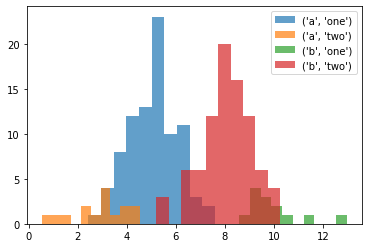

In [35]:
fig, ax = plt.subplots()
for g,x in df1.groupby(["group","time"]).x:
    ax.hist(x,label = str(g),alpha = .7)
ax.legend()

<AxesSubplot:xlabel='time', ylabel='x'>

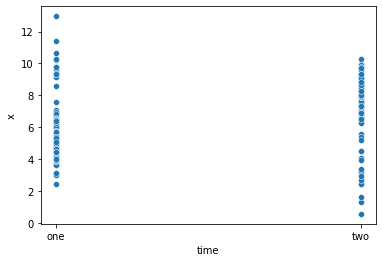

In [19]:
sns.scatterplot(x = df1.time, y = df1.x)

Run a statistical test to further examine the relationship between these features.

Take a look at the data in df2.

In [20]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


Visualize the relationship between x and y.

<AxesSubplot:xlabel='x', ylabel='y'>

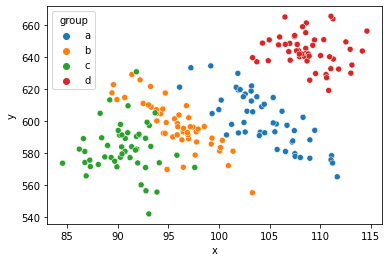

In [30]:
sns.scatterplot(x = df2.x, y = df2.y,hue = df2.group)

How would you describe the relationship between x and y?

In [36]:
# x and y create a linear relationship, although the y values are much higher then the x values given.
# once you group by the different groups, there is a negative linear relationship

Run a statistical test to examine the relationship between x and y.

Take a look at the data in df3

In [4]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


Which surgeon has the higher success rate?

In [22]:
df3.groupby(df3.surgeon).success.mean()

surgeon
A    0.877083
B    0.723077
Name: success, dtype: float64

If you had to have heart bypass surgery, which surgeon would you go to?

In [25]:
bypass_df = df3[df3.surgery == "heart bypass"]

In [26]:
bypass_df.groupby(bypass_df.surgeon).success.mean()

surgeon
A    0.656566
B    0.672249
Name: success, dtype: float64

im going to surgeon b

In [37]:
df3.pivot_table("success","surgeon","surgery")

surgery,appendectomy,heart bypass
surgeon,,
A,0.934383,0.656566
B,0.931373,0.672249


In [39]:
df3.pivot_table("success","surgeon","surgery", aggfunc = lambda x: x.size)

surgery,appendectomy,heart bypass
surgeon,,
A,381,99
B,102,418


### Takeaways:

- visualize your data
- visualize the interaction of multiple variables together
- be careful about assumptions around group membership